In [1]:
#!/usr/bin/env python
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Create a Engine object which is our handle into the database.
engine = create_engine('sqlite:///world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata from the existing database.
#  Since the database already exists and has tables defined, we can create Python objects based on these automatically.
DBInfo=MetaData(engine)

In [3]:
# Auto-create the country object based on the metadata read into the DBInfo.
country=Table('country', DBInfo, autoload=True)

# Mirroring this command: SELECT Population, LifeExpectancy FROM country;
query=select([country.c.Population, country.c.LifeExpectancy])

In [4]:
# Reading SQL query results into a Pandas data frame
df=pd.read_sql(query, conn)
#df.tail()

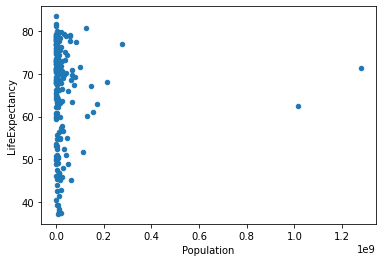

In [5]:
# Making the plot
df.plot(x='Population', y='LifeExpectancy', kind='scatter')
plt.savefig('q4.jpeg', dpi=300)
plt.show()